##### 201A Lecture 9/3: Starting at the End: The Power of Python

# 1. An Introduction to the Environment

The goal for lecture today is to play with a Jupyter Notebook and introduce elements that will help you get familiar with Python as an interactive computational environment for exploring data. The material is presented in an interactive environment that runs within your web browser. It allows presentation of text and graphics to be combined with Python code that can be run interactively. We are looking at a Jupyter notebook now. Note that Jupyter is a relatively recent name for this so sometimes you may still see it referred to as an IPython noteboook. Jupyter is just the new version of IPython notebooks, but now also supports a variety of other languages and tools.

Let's start by getting familiar with the Jupyter Notebook and how it works.
This is fun!!!!!

### 1.1 Launching a Jupyter Notebook on DataHub

In this course we will be using hosted computing facilities to make it easy to start learning to code in Python and to leverage university computing infrastructure. In class we will use datahub, and you can use a Calnet login to connect it at http://datahub.berkeley.edu.

### 1.2 Using Jupyter Notebooks

Once you launch the Jupyter Notebook, and the Notebook opens up in your browser, you will be looking at a directory of the folder you were in when you launched the notebook. you can either load an existing notebook if you see one in the directory, or create a new one. 

Your notebook can record all of your text and code edits, as well as any graphs you generate or calculations you make. You can save the notebook in its current state by clicking Control-S, clicking the floppy disc icon in the toolbar at the top of the page, or by going to the File menu and selecting "Save and Checkpoint".

The next time you open the notebook, it will look the same as when you last saved it.

The Jupyter Notebook is made up of cells. We run a cell by hitting Shift-Enter.

In [1]:
#run this cell
print("I'm excited we're starting to learn Python")

I'm excited we're starting to learn Python


### 1.3 Markdown Cells

Some cells are known as ***markdown cells***, which contain html text that you can use to share your analysis with others, as well as keep notes on what the different lines of code do. (Like this cell!) You can edit the contents of a cell by double-clicking on it.

Try it on this cell. When you are ready to save a markdown cell, just use Shift-Enter.

You can use Markdown syntax to format your text. Documentation on the markdown syntax is available here: https://www.markdownguide.org/basic-syntax/ 

### Hashtags  are for headings
**Two stars** makes text bold and ***three stars*** make the text bold and italic.  Take a minute and create a new markdown cell with some formatted text.  Write yourself an affirming note that you can do this!

### 1.4 Code Cells

In addition to markdown cells, Jupyter has ***code cells***, which contain programming code.  It's in these cells that the magic happens!  Try it - put your curser in the cell below, and hit "Ctrl-Enter" to run the code cell.


In [3]:
import math
 # The following code returns |the square root of the number in the paranthesis
math.sqrt(144)

12.0

That was cool!!!  Try changing the 144 to a different number, and run the cell again.

You can also add comments in your code cells using the hastag.

    # The following code returns the square root of the number in the paranthesis
    
This is called a *comment*. It doesn't make anything happen in Python; Python ignores anything on a line after a `#`.  Instead, it's there to communicate something about the code to you, the human reader. Comments are extremely useful. 

### 1.5 Learning the Python Language

Python is a language, and like natural human languages, it takes time to learn.  There is vocabulary, or "syntax," as well as rules for how that syntax is presented.  Both of these just take practice, practice, practice.  We will teach you the rules, but you need to practice on your own. 

However, programming languages differ from natural language in one important way:

> The rules are rigid. If you're proficient in a natural language, you can understand a non-proficient speaker, glossing over small mistakes. A computer running Python code is not smart enough to do that.

Whenever you write code, you'll make mistakes. Errors are okay; even experienced programmers make many errors. When you make an error, you just have to find the source of the problem, fix it, and move on. Fixing it can take a long time.  A long long time.

In [5]:
print("This line is missing something)

SyntaxError: unterminated string literal (detected at line 1) (2691316070.py, line 1)

The last line of the error output attempts to tell you what went wrong.  The *syntax* of a language is its structure, and this `SyntaxError` tells you that you have created an illegal structure.  "`EOF`" means "end of file," so the message is saying Python expected you to write something more (in this case, a right parenthesis) before finishing the cell.

There's a lot of terminology in programming languages, but you don't need to know it all in order to program effectively. If you can't figure it out intuitively, Google is your best friend!

Try to fix the code above so that you can run the cell and see the intended message instead of an error.

## 2. Example of the Power of Programming

In lab on Thursday, we're going to work with Python to build the foundation of our programming skills using the CHIS data.  But let's do an exercise to show how the knowledge from our past two modules on ACS and mapping come together in this third module.  We're going to see whether a neighborhood's redlining grade correlates with contemporary conditions in a census tract and data from the ACS.

First, we need to download some "libraries" - we'll learn more about libraries in the coming weeks.  For now, just run the code below.

In [6]:
#Importing Utilities
#These are all pre-written Python packages that we will be using to read in, clean, analyze, and model our data.
import os
import re
import folium
import math
import geopandas as gpd
import json
import matplotlib as mpl
import pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import geopandas as gpd
from IPython.display import IFrame
plt.style.use('fivethirtyeight')
# import ipywidgets as widgets
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

### 2.1 Redlining Map for Oakland

Let's first bring in a redlining map for Oakland.  Python easily reads shapefiles and geojson files. 


In [7]:
#This cell imports the map file for Oakland

geo_json_data = json.load(open('CAOakland1937.geojson'))

In [8]:
# This cell assigns each of the HOLC grades a color

def my_color_function(feature):
    if feature['properties']['holc_grade']== 'A':
        return '#98ff98'
    elif feature['properties']['holc_grade']== 'B':
        return '#5bc0de'
    elif feature['properties']['holc_grade'] =='C':
        return '#ffe200'
    else:
        return '#ff00aa'

In [9]:
#  This cell draws the map, including the coordinates for Oakland
m = folium.Map([37.8044,-122.271], tiles='cartodbpositron', zoom_start=12)
folium.GeoJson(
    geo_json_data,
        style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color' : 'black',
        'weight' : 1,   
        }
    ).add_to(m)
m

### 2.2 Comparing Redlining Scores with Conditions Today

Let's explore how redlining still affects neighborhoods today.

Each of the HOLC grades has been given a number. Neighborhoods assigned a value of 1 were considered "safe" to lend in and were indicated in green on the map. Neighborhoods assigned a value of 2 were also considered "safe", were indicated in blue, and borrowers there could get FHA loans. Neighborhoods assigned a value of 3 (yellow) could still get loans, but the appraisers were indicating that they were concerned that the neighborhood was declining. Neighborhoods assigned a value of 4 (red) were considered "hazardous" and the federal government refused to guarantee mortgages in those areas.


In [15]:
#  First, we're going to read in data that Carolina pulled from the Census and American Community Survey
!pip install xlrd
df_2017 = pd.read_excel('Oakland_1990_2017_Data.xlsx', dtype={"Census Tract":str})

In [16]:
# Let's take a look at the data
df_2017.head()

,ID,Census Tract,Redlining Grade,Total Population 1990,Poverty Rate 1990,Percent NonHispanic White 1990,Percent Black 1990,Percent Hispanic 1990,Percent Asian 1990,Percent with a BA Degree or Higher 1990,...,Total Population 2017,Poverty Rate 2017,Percent NonHispanic White 2017,Percent Black 2017,Percent Hispanic 2017,Percent Asian 2017,Percent with a BA Degree or Higher 2017,Percent Homeowners 2017,Median House Value 2017,Gentrification
0,1,06001400100,1.75,2660.18,2.91,87.64,4.20,2.86,8.17,75.54,...,2991,4.20,69.20,2.80,3.80,16.20,81.30,88.00,1104500,1.00
1,2,06001400200,2.17,2031.38,8.84,88.39,4.64,5.51,5.47,67.53,...,1997,5.50,71.30,0.90,8.90,9.80,81.70,59.80,1045200,3.00
2,3,06001400300,2.50,5008.62,12.87,77.57,15.29,7.41,6.21,55.55,...,5123,7.50,67.00,9.40,7.50,9.80,66.30,43.70,943300,1.00
3,4,06001400400,2.67,3857.00,17.95,67.56,23.54,5.29,8.10,56.96,...,3991,9.20,65.80,6.00,9.40,12.10,80.10,36.70,872400,1.00
4,5,06001400500,3.33,3350.00,23.40,34.07,58.19,4.69,7.08,34.99,...,3944,9.40,53.40,24.10,10.30,5.60,67.20,35.80,721700,4.00


### 2.3 Correlation

So even looking at 5 census tracts, we can see that there is a relationship between a higher (worse) redlining score and the poverty rate, even 60 years later.  But maybe this was just a coincidence.  We are going to calculate a "correlation" statistic for all the census tracts in Oakland that will let us compare the relationships more scientifically.

Simply, a correlation statistic tells us the direction and strength of the relationship between two variables.  We're going to create a "widget" that lets us easily compare the redlining grade with different census tract characteristics in 1990 and 2017.  

Go ahead and run the next two cells.

In [25]:
# widget imports 
# import the widgets module
!pip install ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [29]:
a_dd = widgets.Dropdown(options=df_2017.columns.tolist(), description='X')
b_dd = widgets.Dropdown(options=df_2017.columns.tolist(), description='Y')
out = widgets.Output()

def update(_=None):
    with out:
        out.clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(12, 6))

        x = df_2017[a_dd.value].to_numpy()
        y = df_2017[b_dd.value].to_numpy()

        ax.scatter(x, y, alpha=0.5, label='DF_2017')
        m, c = np.polyfit(x, y, 1)
        X = np.linspace(x.min(), x.max(), 200)
        ax.plot(X, m*X + c, linewidth=2, label='Regression line')

        corr = np.corrcoef(x, y)[0, 1]
        ax.set_title(f'{a_dd.value} vs {b_dd.value}  |  y = {c:.2f} + {m:.2f}·x  |  r = {corr:.3f}')
        ax.set_xlabel(a_dd.value); ax.set_ylabel(b_dd.value); ax.legend()
        plt.show()  # rendering contained to this Output area only

a_dd.observe(update, names='value')
b_dd.observe(update, names='value')

# Initial draw
update()

widgets.VBox([widgets.HBox([a_dd, b_dd]), out])

###  2.4 Comparing the Redlining Grade with the Poverty Rate in 2017

Put "Redlining Grade" in the a box and "Poverty Rate 2017" in the b box.  How can we interpret the results?  The correlation is a positive .40909, and the line slopes upwards.  This shows that as a census tract's redlining grade gets worse (with 4 being "redlined"), the poverty rate goes up.  A correlation coefficient of .4 is considered a "strong" correlation (anything above a .3 is meaningful).

How about "Redlining Grade" correlated with the Percent BA Degree or Higher in 2017.  This time we get a negative correlation coefficient - -0.4173.  This means that there is a negative relationship between a tract's redlining grade and the percent of the population that has a BA - in other words, tracts that were redlined have fewer residents who have completed their BA degree.

### 2.5 Map the Indicators

Now that we're in Python, it becomes pretty easy to make maps of Oakland using the indicators in our dataset.  Feel free to make some maps of the indicators you explored above!

#### Gentrification

The dataset also includes a numeric "risk" score for gentrification, based on the gentrification maps produced by the Urban Displacement Project.  A higher number means the neighborhood is at higher risk of gentrification. 

In [20]:
#  Just run this cell

tracts_gdf = gpd.read_file('Oakland_Tracts.shp')
merged_gdf=tracts_gdf.set_index("GEOID_2").join(df_2017.set_index("Census Tract"))

In [21]:
# Run this to get a list of variables in the data
df_2017.columns

Index(['ID', 'Census Tract', 'Redlining Grade', 'Total Population 1990',
       'Poverty Rate 1990', 'Percent NonHispanic White 1990',
       'Percent Black 1990', 'Percent Hispanic 1990', 'Percent Asian 1990',
       'Percent with a BA Degree or Higher 1990', 'Percent Homeowners 1990',
       'Median House Value 1990', 'Total Population 2017', 'Poverty Rate 2017',
       'Percent NonHispanic White 2017', 'Percent Black 2017',
       'Percent Hispanic 2017', 'Percent Asian 2017',
       'Percent with a BA Degree or Higher 2017', 'Percent Homeowners 2017',
       'Median House Value 2017', 'Gentrification'],
      dtype='object')

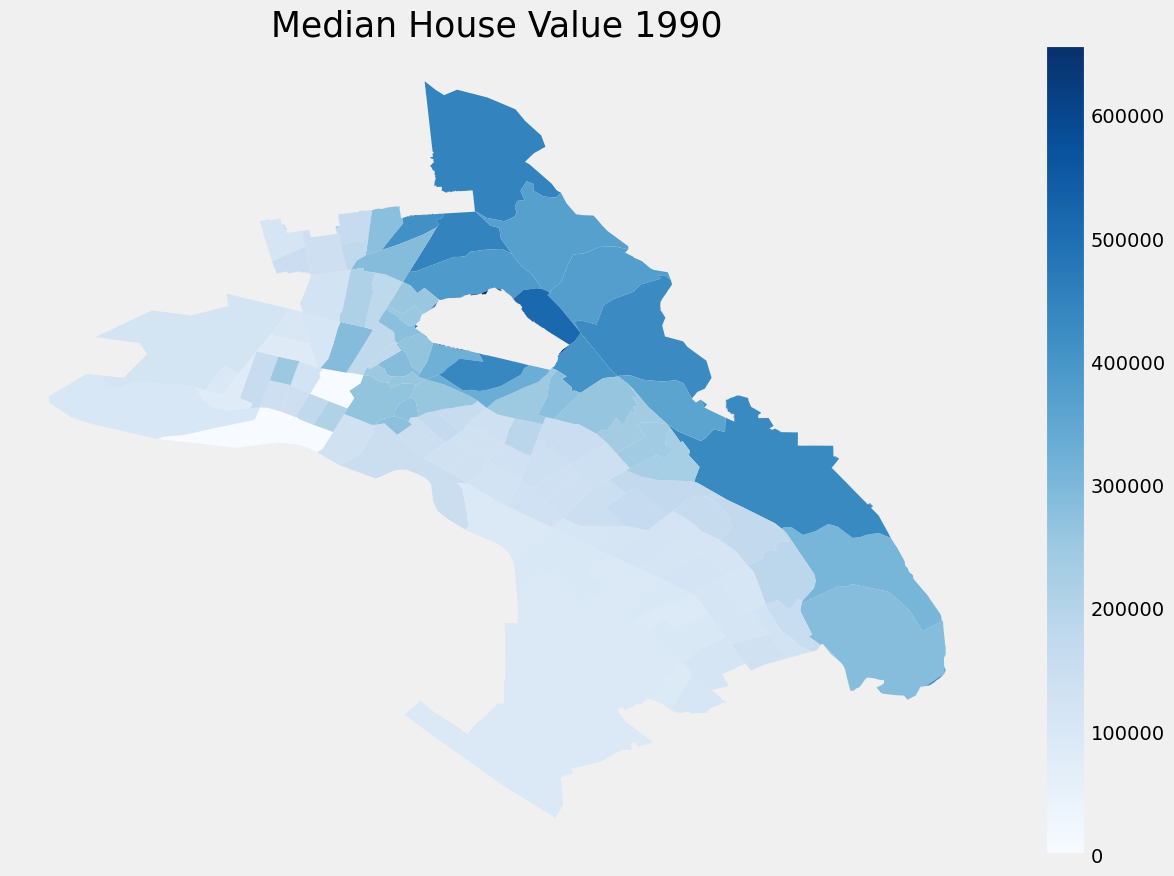

In [22]:
# This cell draws the map - just change the text in red after "column=" and what you want the title to be to change the indicator being mapped

figure, ax = plt.subplots(figsize=(14,10))
ax = merged_gdf.plot(column="Median House Value 1990", legend=True, ax=ax, cmap="Blues")
lims=plt.axis("equal") 
ax.set_axis_off()
ax.set_title('Median House Value 1990', fontdict= 
            {'fontsize':25})
plt.show()

## Fascinating, right?  And super powerful when we put it to use for planning questions.

### 3.0  Resetting the Python Notebook

If you want to run through the notebook again on your own, just click on the link in bCourses, and then when you start the session, select "Kernel" from the menu above, and then select "Restart & Clear Output".  This will give you a "refreshed" version of the notebook.  Just don't forget that you need to run the cells in order that they're presented in the notebook!